In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv('./stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [48]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
df = df.drop('id', axis = 1)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [50]:
df = df.drop('age', axis = 1)

In [51]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='stroke'>

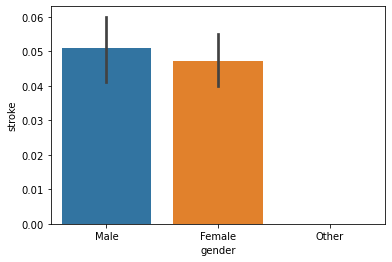

In [52]:
import seaborn as sns

sns.barplot(x = 'gender', y = 'stroke', data = df)

In [53]:
df = df.drop('gender', axis = 1)

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

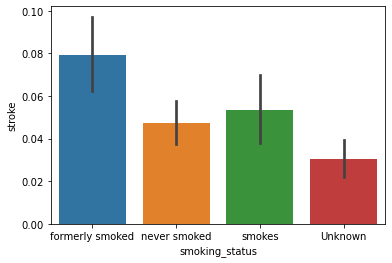

In [54]:
sns.barplot(x = 'smoking_status', y = 'stroke', data = df)

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

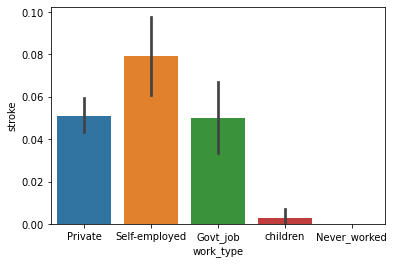

In [55]:
sns.barplot(x = 'work_type', y = 'stroke', data = df)

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

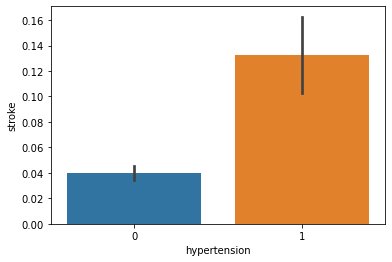

In [56]:
sns.barplot(x = 'hypertension', y = 'stroke', data = df)

In [57]:
df = df.drop('smoking_status', axis = 1)

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

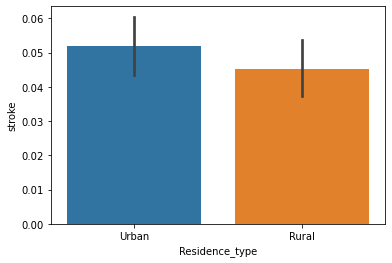

In [58]:
sns.barplot(x = 'Residence_type', y = 'stroke', data = df)

In [59]:
df = df.drop('Residence_type', axis = 1)

In [60]:
df.head()

,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke
0,0,1,Yes,Private,228.69,36.600000,1
1,0,0,Yes,Self-employed,202.21,28.893237,1
2,0,1,Yes,Private,105.92,32.500000,1
3,0,0,Yes,Private,171.23,34.400000,1
4,1,0,Yes,Self-employed,174.12,24.000000,1


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

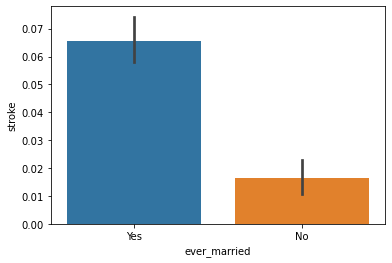

In [61]:
sns.barplot(x = 'ever_married', y = 'stroke', data = df)

In [67]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [68]:
def category(ever_married):
    cat = ''
    if ever_married == 'Yes': cat = 0
    else: cat = 1
    return cat
        
df["ever_married"] = df["ever_married"].apply(lambda x : category(x))
df.head()

,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke
0,0,1,0,Private,228.69,36.600000,1
1,0,0,0,Self-employed,202.21,28.893237,1
2,0,1,0,Private,105.92,32.500000,1
3,0,0,0,Private,171.23,34.400000,1
4,1,0,0,Self-employed,174.12,24.000000,1


In [69]:
df = df.drop('work_type', axis = 1)
df.head()

,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,228.69,36.600000,1
1,0,0,0,202.21,28.893237,1
2,0,1,0,105.92,32.500000,1
3,0,0,0,171.23,34.400000,1
4,1,0,0,174.12,24.000000,1


In [72]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 11)

In [76]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [77]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       967
           1       0.33      0.05      0.09        55

    accuracy                           0.94      1022
   macro avg       0.64      0.52      0.53      1022
weighted avg       0.92      0.94      0.92      1022

